# Deep Learning e Computer Vision - VERSIONE DOCENTE

## Introduzione

Il **Deep Learning** è un sottoinsieme del Machine Learning basato su reti neurali artificiali con molteplici livelli ("deep" = profondo). Negli ultimi anni ha rivoluzionato campi come:
- Computer Vision (riconoscimento immagini)
- Natural Language Processing (traduzione, chatbot)
- Speech Recognition (assistenti vocali)
- Sistemi di raccomandazione
- Guida autonoma

### Perché Deep Learning?

**Vantaggi rispetto al ML classico:**
- **Apprendimento automatico delle feature**: non serve feature engineering manuale
- **Performance su grandi dataset**: scala meglio con più dati
- **Capacità di catturare pattern complessi**: gerarchie di rappresentazioni

**Svantaggi:**
- Richiede molti dati
- Computazionalmente intensivo (serve GPU)
- Meno interpretabile ("black box")
- Rischio di overfitting se non gestito correttamente

---

## 1. Che cos'è il Deep Learning

### Dall'AI al Deep Learning

```
Intelligenza Artificiale (AI)
    └── Machine Learning (ML)
            └── Deep Learning (DL)
```

- **AI**: campo generale che studia macchine intelligenti
- **ML**: subset di AI che impara dai dati senza programmazione esplicita
- **DL**: subset di ML basato su reti neurali profonde

### Evoluzione storica

1. **1943**: McCulloch-Pitts, primo modello neurone artificiale
2. **1958**: Perceptron di Rosenblatt
3. **1986**: Backpropagation (Rumelhart, Hinton, Williams)
4. **1998**: LeNet (Yann LeCun) per riconoscimento cifre
5. **2006**: Renaissance del DL (Hinton)
6. **2012**: AlexNet vince ImageNet, inizio dell'era moderna
7. **2017+**: Transformers (BERT, GPT) rivoluzionano NLP

### Fattori che hanno reso possibile il DL moderno

1. **Big Data**: miliardi di immagini, testi, video disponibili
2. **GPU**: calcolo parallelo massivo
3. **Algoritmi migliorati**: ReLU, dropout, batch normalization
4. **Framework**: TensorFlow, PyTorch rendono lo sviluppo accessibile

---

## 2. Reti Neurali Artificiali

### 2.1 Il Neurone Artificiale

Un **neurone artificiale** (o perceptron) è l'unità base delle reti neurali.

#### Componenti:

1. **Input**: $x_1, x_2, ..., x_n$
2. **Pesi**: $w_1, w_2, ..., w_n$ (parametri da apprendere)
3. **Bias**: $b$ (parametro da apprendere)
4. **Somma pesata**: $z = \sum_{i=1}^{n} w_i x_i + b$
5. **Funzione di attivazione**: $a = f(z)$
6. **Output**: $a$

#### Funzioni di attivazione comuni:

**Sigmoid**: $\sigma(z) = \frac{1}{1 + e^{-z}}$
- Output in [0, 1]
- Usata per probabilità
- Problema: vanishing gradient

**Tanh**: $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
- Output in [-1, 1]
- Zero-centered (meglio di sigmoid)

**ReLU** (Rectified Linear Unit): $\text{ReLU}(z) = \max(0, z)$
- Semplice e efficace
- Standard per hidden layers
- Risolve vanishing gradient

**Softmax** (per output layer classificazione multi-classe):
$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$$

### 2.2 Architettura di una Rete Neurale

Una rete neurale è composta da **layer** (strati) di neuroni:

1. **Input Layer**: riceve i dati
2. **Hidden Layers**: uno o più strati intermedi
3. **Output Layer**: produce le predizioni

```
Input → Hidden 1 → Hidden 2 → ... → Output
```

**Deep Neural Network**: rete con molti hidden layers (≥ 2)

### 2.3 Forward Propagation

Il processo di calcolare l'output dato un input:

```
Layer 1: a[1] = f(W[1] · x + b[1])
Layer 2: a[2] = f(W[2] · a[1] + b[2])
...
Output:  ŷ = a[L]
```

### 2.4 Backpropagation e Training

**Obiettivo**: minimizzare la loss function rispetto ai parametri

1. **Forward pass**: calcola predizioni
2. **Calcola loss**: $L(\hat{y}, y)$
3. **Backward pass**: calcola gradienti con chain rule
4. **Update parametri**: $w := w - \alpha \frac{\partial L}{\partial w}$

**Loss functions comuni:**
- **Regressione**: Mean Squared Error (MSE)
- **Classificazione binaria**: Binary Cross-Entropy
- **Classificazione multi-classe**: Categorical Cross-Entropy

---

## 3. Setup: TensorFlow e Keras

**TensorFlow** è un framework open-source di Google per deep learning.
**Keras** è un'API ad alto livello integrata in TensorFlow per costruire reti neurali in modo semplice.

In [1]:
# Import librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms

# Scikit-learn per preprocessing e metriche
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Impostazioni
np.random.seed(42)
torch.manual_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Device: {device}")
print(f"CUDA disponibile: {torch.cuda.is_available()}")

---

## 4. Prima Rete Neurale: Classificazione con MNIST

**MNIST** è un dataset classico di cifre scritte a mano (0-9):
- 60,000 immagini di training
- 10,000 immagini di test
- Dimensione: 28x28 pixel in scala di grigi

### 4.1 Caricamento Dati

In [2]:
# Caricamento MNIST da torchvision
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True)

X_train = mnist_train.data.numpy()  # (60000, 28, 28)
y_train = mnist_train.targets.numpy()
X_test = mnist_test.data.numpy()
y_test = mnist_test.targets.numpy()

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nRange valori pixel: [{X_train.min()}, {X_train.max()}]")
print(f"Classi: {np.unique(y_train)}")

# Visualizzazione esempi
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Etichetta: {y_train[i]}")
    ax.axis('off')
plt.suptitle('Esempi MNIST')
plt.tight_layout()
plt.show()

### 4.2 Preprocessing

Per una rete neurale fully-connected:
1. **Flatten**: trasformare immagini 28x28 in vettori 784
2. **Normalizzazione**: scalare pixel da [0, 255] a [0, 1]

In [3]:
# Flatten: da (28, 28) a (784,)
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

print(f"Shape dopo flatten:")
print(f"  Training: {X_train_flat.shape}")
print(f"  Test: {X_test_flat.shape}")

# Normalizzazione
X_train_norm = X_train_flat / 255.0
X_test_norm = X_test_flat / 255.0

print(f"\nRange dopo normalizzazione: [{X_train_norm.min():.2f}, {X_train_norm.max():.2f}]")

## Esercizio 1

In [4]:
# ============================================================================
# ESERCIZIO 1: Preprocessing e Analisi Dataset Fashion MNIST
# ============================================================================
# Task: Caricare, preprocessare e analizzare Fashion MNIST
# Dataset: Fashion MNIST (70000 immagini 28x28, 10 classi di abbigliamento)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torchvision

# Caricamento dataset Fashion MNIST
np.random.seed(123)
fmnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
fmnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True)

X_train_fmnist = fmnist_train.data.numpy()
y_train_fmnist = fmnist_train.targets.numpy()
X_test_fmnist = fmnist_test.data.numpy()
y_test_fmnist = fmnist_test.targets.numpy()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Dataset Fashion MNIST")
print(f"Train shape: {X_train_fmnist.shape}")
print(f"Test shape: {X_test_fmnist.shape}")
print(f"Range valori originali: [{X_train_fmnist.min()}, {X_train_fmnist.max()}]")
print(f"Numero classi: {len(class_names)}")

# Visualizzazione esempi per classe
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    idx = np.where(y_train_fmnist == i)[0][0]
    ax.imshow(X_train_fmnist[idx], cmap='gray')
    ax.set_title(class_names[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

# Step 1: Flatten e normalizzazione
X_train_flat_fmnist = X_train_fmnist.reshape(-1, 784).astype('float32') / 255.0
X_test_flat_fmnist = X_test_fmnist.reshape(-1, 784).astype('float32') / 255.0

print(f"\nDopo preprocessing:")
print(f"Train shape: {X_train_flat_fmnist.shape}, range: [{X_train_flat_fmnist.min():.2f}, {X_train_flat_fmnist.max():.2f}]")
print(f"Test shape: {X_test_flat_fmnist.shape}")

# Step 2: Analisi distribuzione classi
class_counts = pd.Series(y_train_fmnist).value_counts().sort_index()
class_percentages = (class_counts / len(y_train_fmnist) * 100).round(2)
distribution_df = pd.DataFrame({
    'classe_id': class_counts.index,
    'nome_classe': [class_names[i] for i in class_counts.index],
    'conteggio': class_counts.values,
    'percentuale': class_percentages.values
})

print("\nDistribuzione classi:")
print(distribution_df)

# Step 3: Analisi statistica pixel per classe
stats_list = []
for class_id in range(10):
    class_images = X_train_fmnist[y_train_fmnist == class_id]
    stats_list.append({
        'classe_id': class_id,
        'nome_classe': class_names[class_id],
        'media_pixel': class_images.mean(),
        'std_pixel': class_images.std(),
        'min_pixel': class_images.min(),
        'max_pixel': class_images.max()
    })

stats_df = pd.DataFrame(stats_list)
print("\nStatistiche pixel per classe:")
print(stats_df.to_string(index=False))

# Step 4: Calcolo matrice di correlazione tra classi
mean_images = []
for class_id in range(10):
    class_images_flat = X_train_flat_fmnist[y_train_fmnist == class_id]
    mean_image = class_images_flat.mean(axis=0)
    mean_images.append(mean_image)

mean_images = np.array(mean_images)
corr_matrix = np.corrcoef(mean_images)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=class_names, yticklabels=class_names,
            vmin=-1, vmax=1, center=0)
plt.title('Correlazione tra Classi (basata su immagini medie)')
plt.tight_layout()
plt.show()

# Step 5: Visualizzazione varianza pixel
pixel_variance = X_train_fmnist.reshape(-1, 784).var(axis=0)
variance_heatmap = pixel_variance.reshape(28, 28)

plt.figure(figsize=(8, 8))
plt.imshow(variance_heatmap, cmap='viridis')
plt.colorbar(label='Varianza')
plt.title('Varianza per Pixel (tutto il dataset)')
plt.tight_layout()
plt.show()

print(f"\nPixel con varianza piu' alta: indice {pixel_variance.argmax()}, valore {pixel_variance.max():.2f}")
print(f"Pixel con varianza piu' bassa: indice {pixel_variance.argmin()}, valore {pixel_variance.min():.2f}")

print("\nEsercizio 1 completato!")

### 4.3 Costruzione del Modello

Keras offre due API:
1. **Sequential API**: per modelli lineari (layer dopo layer)
2. **Functional API**: per architetture complesse

Useremo la Sequential API.

In [5]:
# Creazione modello
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
).to(device)

# Visualizzazione architettura
print(model)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal params: {total_params:,}")
print(f"Trainable params: {trainable_params:,}")

**Spiegazione dell'architettura:**

1. **Hidden Layer 1**: 784 input → 128 neuroni con ReLU
   - Parametri: (784 × 128) + 128 bias = 100,480

2. **Hidden Layer 2**: 128 input → 64 neuroni con ReLU
   - Parametri: (128 × 64) + 64 bias = 8,256

3. **Output Layer**: 64 input → 10 neuroni con Softmax
   - Parametri: (64 × 10) + 10 bias = 650
   - Softmax produce probabilità per le 10 classi

**Totale parametri trainabili: 109,386**

### 4.4 Compilazione del Modello

Prima del training, dobbiamo specificare:
1. **Optimizer**: algoritmo di ottimizzazione (Adam è lo standard)
2. **Loss function**: funzione da minimizzare
3. **Metriche**: per monitorare il training

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Modello compilato e pronto per il training")

**Note sulle loss functions:**

- `sparse_categorical_crossentropy`: quando le label sono intere (0, 1, 2, ..., 9)
- `categorical_crossentropy`: quando le label sono one-hot encoded
- `binary_crossentropy`: per classificazione binaria

### 4.5 Training del Modello

In [7]:
# Training
# Preparazione dati
X_train_tensor = torch.FloatTensor(X_train_norm).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)

# Split training/validation (80/20)
n_val = int(len(X_train_tensor) * 0.2)
indices = torch.randperm(len(X_train_tensor))
train_indices = indices[n_val:]
val_indices = indices[:n_val]

X_tr = X_train_tensor[train_indices]
y_tr = y_train_tensor[train_indices]
X_val = X_train_tensor[val_indices]
y_val = y_train_tensor[val_indices]

train_dataset = TensorDataset(X_tr, y_tr)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Training loop
epochs = 10
history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * batch_X.size(0)
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val).item()
        _, val_predicted = torch.max(val_outputs, 1)
        val_acc = (val_predicted == y_val).sum().item() / len(y_val)

    history['loss'].append(train_loss)
    history['accuracy'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)

    print(f'Epoch {epoch+1}/{epochs} - loss: {train_loss:.4f} - accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}')

print("\nTraining completato")

**Parametri di training:**

- **epochs**: numero di passaggi completi sul dataset
- **batch_size**: numero di sample processati prima di aggiornare i pesi
  - Batch piccoli: più rumore, ma converge più velocemente
  - Batch grandi: gradienti più stabili, ma serve più memoria
- **validation_split**: frazione dei dati per validation

### 4.6 Visualizzazione Training History

In [8]:
# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history['loss'], label='Training Loss')
axes[0].plot(history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss durante Training')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Accuracy
axes[1].plot(history['accuracy'], label='Training Accuracy')
axes[1].plot(history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy durante Training')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 4.7 Valutazione sul Test Set

In [9]:
# Valutazione
X_test_tensor = torch.FloatTensor(X_test_norm).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor).item()
    _, y_pred_tensor = torch.max(test_outputs, 1)
    test_accuracy = (y_pred_tensor == y_test_tensor).sum().item() / len(y_test_tensor)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predizioni
y_pred = y_pred_tensor.cpu().numpy()
y_pred_proba = torch.softmax(test_outputs, dim=1).cpu().numpy()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title('Confusion Matrix')
plt.show()

# Visualizzazione predizioni
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(X_test))
    ax.imshow(X_test[idx], cmap='gray')

    true_label = y_test[idx]
    pred_label = y_pred[idx]
    confidence = y_pred_proba[idx][pred_label]

    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f"True: {true_label}\nPred: {pred_label} ({confidence:.2f})", color=color)
    ax.axis('off')

plt.suptitle('Predizioni su Test Set')
plt.tight_layout()
plt.show()

## Esercizio 2

In [10]:
# ============================================================================
# ESERCIZIO 2: Costruzione e Training Rete Neurale Multi-Layer
# ============================================================================
# Task: Costruire rete neurale per classificazione binaria con diverse configurazioni
# Dataset: MNIST binario - classificare cifre pari vs dispari (60000 campioni)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from sklearn.metrics import classification_report, confusion_matrix

# Preparazione dataset binario: pari (0) vs dispari (1)
np.random.seed(456)
torch.manual_seed(456)
mnist_train_ex2 = torchvision.datasets.MNIST(root='./data', train=True, download=True)
mnist_test_ex2 = torchvision.datasets.MNIST(root='./data', train=False, download=True)

X_mnist = mnist_train_ex2.data.numpy()
y_mnist = mnist_train_ex2.targets.numpy()
X_test_mnist = mnist_test_ex2.data.numpy()
y_test_mnist = mnist_test_ex2.targets.numpy()

y_train_binary = (y_mnist % 2).astype(int)
y_test_binary = (y_test_mnist % 2).astype(int)

X_train_binary = X_mnist.reshape(-1, 784) / 255.0
X_test_binary = X_test_mnist.reshape(-1, 784) / 255.0

print(f"Dataset MNIST Binario (Pari vs Dispari)")
print(f"Train: {X_train_binary.shape}")
print(f"Distribuzione: Pari={np.sum(y_train_binary==0)}, Dispari={np.sum(y_train_binary==1)}")

# Visualizzazione esempi
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    axes[0, i].imshow(X_mnist[y_train_binary==0][i], cmap='gray')
    axes[0, i].set_title(f'Pari: {y_mnist[y_train_binary==0][i]}')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_mnist[y_train_binary==1][i], cmap='gray')
    axes[1, i].set_title(f'Dispari: {y_mnist[y_train_binary==1][i]}')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

# Helper function for training binary models
def train_binary_model(model, X_train_np, y_train_np, epochs=15, batch_size=128, val_split=0.2):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    X_t = torch.FloatTensor(X_train_np).to(device)
    y_t = torch.FloatTensor(y_train_np).to(device)

    n_val = int(len(X_t) * val_split)
    indices = torch.randperm(len(X_t))
    X_tr = X_t[indices[n_val:]]
    y_tr = y_t[indices[n_val:]]
    X_v = X_t[indices[:n_val]]
    y_v = y_t[indices[:n_val]]

    train_ds = TensorDataset(X_tr, y_tr)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for bx, by in train_loader:
            optimizer.zero_grad()
            out = model(bx).squeeze()
            loss = criterion(out, by)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * bx.size(0)
            predicted = (torch.sigmoid(out) > 0.5).float()
            total += by.size(0)
            correct += (predicted == by).sum().item()

        train_loss = running_loss / total
        train_acc = correct / total

        model.eval()
        with torch.no_grad():
            val_out = model(X_v).squeeze()
            val_loss = criterion(val_out, y_v).item()
            val_pred = (torch.sigmoid(val_out) > 0.5).float()
            val_acc = (val_pred == y_v).sum().item() / len(y_v)

        history['loss'].append(train_loss)
        history['accuracy'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_acc)

        print(f'  Epoch {epoch+1}/{epochs} - loss: {train_loss:.4f} - accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}')

    return history

# Step 1: Costruzione modello shallow (1 hidden layer)
model_shallow = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
).to(device)

print("Architettura Shallow:")
print(model_shallow)
print(f'Parametri: {sum(p.numel() for p in model_shallow.parameters()):,}')

# Step 2: Costruzione modello deep (3 hidden layers)
model_deep_ex2 = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
).to(device)

print("\nArchitettura Deep:")
print(model_deep_ex2)
print(f'Parametri: {sum(p.numel() for p in model_deep_ex2.parameters()):,}')

# Step 3: Training entrambi i modelli
print("\nTraining Shallow Model...")
history_shallow = train_binary_model(model_shallow, X_train_binary, y_train_binary, epochs=15)

print("\nTraining Deep Model...")
history_deep = train_binary_model(model_deep_ex2, X_train_binary, y_train_binary, epochs=15)

# Step 4: Confronto performance
def evaluate_binary(model, X, y):
    model.eval()
    with torch.no_grad():
        X_t = torch.FloatTensor(X).to(device)
        out = model(X_t).squeeze()
        loss = nn.BCEWithLogitsLoss()(out, torch.FloatTensor(y).to(device)).item()
        pred = (torch.sigmoid(out) > 0.5).float()
        acc = (pred.cpu().numpy() == y).mean()
    return loss, acc

test_loss_shallow, test_acc_shallow = evaluate_binary(model_shallow, X_test_binary, y_test_binary)
test_loss_deep, test_acc_deep = evaluate_binary(model_deep_ex2, X_test_binary, y_test_binary)

train_acc_shallow = max(history_shallow['accuracy'])
val_acc_shallow = max(history_shallow['val_accuracy'])
train_acc_deep = max(history_deep['accuracy'])
val_acc_deep = max(history_deep['val_accuracy'])

comparison_df = pd.DataFrame([
    {
        'modello': 'Shallow',
        'train_acc': train_acc_shallow,
        'val_acc': val_acc_shallow,
        'test_acc': test_acc_shallow,
        'num_params': sum(p.numel() for p in model_shallow.parameters())
    },
    {
        'modello': 'Deep',
        'train_acc': train_acc_deep,
        'val_acc': val_acc_deep,
        'test_acc': test_acc_deep,
        'num_params': sum(p.numel() for p in model_deep_ex2.parameters())
    }
])

print("\n" + "="*70)
print("CONFRONTO SHALLOW vs DEEP")
print("="*70)
print(comparison_df.to_string(index=False))

# Visualizzazione learning curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_shallow['accuracy'], label='Shallow Train', linestyle='--')
axes[0].plot(history_shallow['val_accuracy'], label='Shallow Val', linestyle='--')
axes[0].plot(history_deep['accuracy'], label='Deep Train')
axes[0].plot(history_deep['val_accuracy'], label='Deep Val')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy: Shallow vs Deep')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(history_shallow['loss'], label='Shallow Train', linestyle='--')
axes[1].plot(history_shallow['val_loss'], label='Shallow Val', linestyle='--')
axes[1].plot(history_deep['loss'], label='Deep Train')
axes[1].plot(history_deep['val_loss'], label='Deep Val')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss: Shallow vs Deep')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Step 5: Analisi errori
best_model_ex2 = model_deep_ex2 if test_acc_deep > test_acc_shallow else model_shallow
best_name_ex2 = 'Deep' if test_acc_deep > test_acc_shallow else 'Shallow'

best_model_ex2.eval()
with torch.no_grad():
    X_test_t = torch.FloatTensor(X_test_binary).to(device)
    y_pred_probs = torch.sigmoid(best_model_ex2(X_test_t).squeeze()).cpu().numpy()
y_pred_ex2 = (y_pred_probs > 0.5).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_ex2)

plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pari', 'Dispari'],
            yticklabels=['Pari', 'Dispari'])
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title(f'Confusion Matrix - Modello {best_name_ex2}')
plt.tight_layout()
plt.show()

print(f'\nClassification Report - Modello {best_name_ex2}:')
print(classification_report(y_test_binary, y_pred_ex2, target_names=['Pari', 'Dispari']))

# Confronto parametri vs performance
fig, ax = plt.subplots(figsize=(8, 6))
models_data = comparison_df['modello'].values
params = comparison_df['num_params'].values
test_accs = comparison_df['test_acc'].values

scatter = ax.scatter(params, test_accs, s=200, alpha=0.6, c=['blue', 'red'])
for i, txt in enumerate(models_data):
    ax.annotate(txt, (params[i], test_accs[i]), fontsize=12, ha='center')

ax.set_xlabel('Numero Parametri')
ax.set_ylabel('Test Accuracy')
ax.set_title('Trade-off: Complessita vs Performance')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nEsercizio 2 completato!")

---

## 5. Come Ridurre l'Overfitting

L'**overfitting** si verifica quando il modello memorizza il training set invece di generalizzare.

**Segnali di overfitting:**
- Training accuracy alta, validation accuracy bassa
- Gap crescente tra training e validation loss

### 5.1 Dropout

**Dropout** disattiva casualmente una frazione di neuroni durante il training, forzando la rete a non dipendere da singoli neuroni.

In [11]:
# Modello con Dropout
model_dropout = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 10)
).to(device)

criterion_dropout = nn.CrossEntropyLoss()
optimizer_dropout = optim.Adam(model_dropout.parameters(), lr=0.001)

print(model_dropout)
total_params = sum(p.numel() for p in model_dropout.parameters())
print(f"Total params: {total_params:,}")

### 5.2 Regularization (L1/L2)

**Regularization** penalizza pesi grandi, forzando il modello a usare tutti i neuroni in modo equilibrato.

- **L1**: $\lambda \sum |w_i|$ (favorisce sparsità)
- **L2**: $\lambda \sum w_i^2$ (favorisce pesi piccoli)

In [12]:
# Modello con L2 regularization (weight_decay nell'optimizer)
model_reg = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
).to(device)

criterion_reg = nn.CrossEntropyLoss()
# weight_decay corrisponde a L2 regularization
optimizer_reg = optim.Adam(model_reg.parameters(), lr=0.001, weight_decay=0.001)

print("Modello con L2 regularization creato")

### 5.3 Early Stopping

**Early Stopping** ferma il training quando la validation loss smette di migliorare.

In [13]:
# Training con early stopping
# Preparazione dati
X_train_t = torch.FloatTensor(X_train_norm).to(device)
y_train_t = torch.LongTensor(y_train).to(device)

n_val = int(len(X_train_t) * 0.2)
indices_es = torch.randperm(len(X_train_t))
X_tr_es = X_train_t[indices_es[n_val:]]
y_tr_es = y_train_t[indices_es[n_val:]]
X_val_es = X_train_t[indices_es[:n_val]]
y_val_es = y_train_t[indices_es[:n_val]]

train_ds_es = TensorDataset(X_tr_es, y_tr_es)
train_loader_es = DataLoader(train_ds_es, batch_size=128, shuffle=True)

# Early stopping manuale
epochs = 20
patience = 3
best_val_loss = float('inf')
patience_counter = 0
best_state = None
history_es = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

for epoch in range(epochs):
    model_dropout.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_X, batch_y in train_loader_es:
        optimizer_dropout.zero_grad()
        outputs = model_dropout(batch_X)
        loss = criterion_dropout(outputs, batch_y)
        loss.backward()
        optimizer_dropout.step()

        running_loss += loss.item() * batch_X.size(0)
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    model_dropout.eval()
    with torch.no_grad():
        val_out = model_dropout(X_val_es)
        val_loss = criterion_dropout(val_out, y_val_es).item()
        _, val_pred = torch.max(val_out, 1)
        val_acc = (val_pred == y_val_es).sum().item() / len(y_val_es)

    history_es['loss'].append(train_loss)
    history_es['accuracy'].append(train_acc)
    history_es['val_loss'].append(val_loss)
    history_es['val_accuracy'].append(val_acc)

    print(f'Epoch {epoch+1}/{epochs} - loss: {train_loss:.4f} - accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}')

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_state = {k: v.clone() for k, v in model_dropout.state_dict().items()}
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            model_dropout.load_state_dict(best_state)
            break

### 5.4 Data Augmentation

**Data Augmentation** aumenta artificialmente il dataset applicando trasformazioni alle immagini:
- Rotazioni
- Traslazioni
- Zoom
- Flip

Questo aiuta il modello a generalizzare meglio.

In [14]:
# Data Augmentation con torchvision.transforms
augmentation_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.RandomAffine(degrees=0, scale=(0.9, 1.1)),
    transforms.ToTensor(),
])

# Visualizzazione augmentation
sample_img = X_train[0]  # (28, 28) numpy array

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

axes[0].imshow(sample_img, cmap='gray')
axes[0].set_title('Originale')
axes[0].axis('off')

# Genera 9 versioni augmented
sample_tensor = torch.from_numpy(sample_img).unsqueeze(0).to(torch.uint8)  # (1, 28, 28)
for i in range(1, 10):
    augmented = augmentation_transforms(sample_tensor)
    axes[i].imshow(augmented.squeeze().numpy(), cmap='gray')
    axes[i].set_title(f'Augmented {i}')
    axes[i].axis('off')

plt.suptitle('Data Augmentation Examples')
plt.tight_layout()
plt.show()

### 5.5 Batch Normalization

**Batch Normalization** normalizza gli input di ogni layer, stabilizzando e accelerando il training.

In [15]:
# Modello con Batch Normalization
model_bn = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Dropout(0.3),
    nn.Linear(64, 10)
).to(device)

print(model_bn)
total_params = sum(p.numel() for p in model_bn.parameters())
print(f"Total params: {total_params:,}")

### 5.6 Confronto Tecniche Anti-Overfitting

In [16]:
# Training da zero per confronto equo
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_model_multiclass(model, X_train_np, y_train_np, epochs=10, batch_size=128, val_split=0.2, weight_decay=0.0):
    """Helper function per training modelli multiclasse."""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)

    X_t = torch.FloatTensor(X_train_np).to(device)
    y_t = torch.LongTensor(y_train_np).to(device)

    n_val = int(len(X_t) * val_split)
    idx = torch.randperm(len(X_t))
    X_tr, y_tr = X_t[idx[n_val:]], y_t[idx[n_val:]]
    X_vl, y_vl = X_t[idx[:n_val]], y_t[idx[:n_val]]

    train_ds = TensorDataset(X_tr, y_tr)
    loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        for bx, by in loader:
            optimizer.zero_grad()
            out = model(bx)
            loss = criterion(out, by)
            loss.backward()
            optimizer.step()

    return model

def evaluate_model(model, X_np, y_np):
    """Valuta un modello e ritorna accuracy."""
    model.eval()
    with torch.no_grad():
        X_t = torch.FloatTensor(X_np).to(device)
        y_t = torch.LongTensor(y_np).to(device)
        out = model(X_t)
        _, pred = torch.max(out, 1)
        acc = (pred == y_t).sum().item() / len(y_t)
    return acc

# Ricreo tutti i modelli da zero
model_baseline_new = nn.Sequential(
    nn.Linear(784, 128), nn.ReLU(),
    nn.Linear(128, 64), nn.ReLU(),
    nn.Linear(64, 10)
).to(device)

model_dropout_new = nn.Sequential(
    nn.Linear(784, 128), nn.ReLU(), nn.Dropout(0.3),
    nn.Linear(128, 64), nn.ReLU(), nn.Dropout(0.3),
    nn.Linear(64, 10)
).to(device)

model_reg_new = nn.Sequential(
    nn.Linear(784, 128), nn.ReLU(),
    nn.Linear(128, 64), nn.ReLU(),
    nn.Linear(64, 10)
).to(device)

model_bn_new = nn.Sequential(
    nn.Linear(784, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.3),
    nn.Linear(128, 64), nn.ReLU(), nn.BatchNorm1d(64), nn.Dropout(0.3),
    nn.Linear(64, 10)
).to(device)

# Training con stesse condizioni
EPOCHS = 10
risultati = []

models_compare = {
    'Baseline': (model_baseline_new, 0.0),
    'Dropout': (model_dropout_new, 0.0),
    'L2 Regularization': (model_reg_new, 0.001),
    'Batch Normalization': (model_bn_new, 0.0)
}

for nome, (modello, wd) in models_compare.items():
    print(f'Training {nome}...')
    train_model_multiclass(modello, X_train_norm, y_train, epochs=EPOCHS, weight_decay=wd)
    test_acc = evaluate_model(modello, X_test_norm, y_test)
    risultati.append({
        'Modello': nome,
        'Test Accuracy': test_acc
    })
    print(f'  {nome}: {test_acc:.4f}')

# Confronto risultati
df_risultati = pd.DataFrame(risultati).sort_values(
    'Test Accuracy', ascending=False
)
print("\nConfronto Tecniche:")
print(df_risultati.to_string(index=False))

# Visualizzazione
plt.figure(figsize=(10, 6))
plt.barh(
    df_risultati['Modello'],
    df_risultati['Test Accuracy']
)
plt.xlabel('Test Accuracy')
plt.title('Confronto Tecniche Anti-Overfitting')
plt.xlim([0.9, 1.0])
for i, v in enumerate(df_risultati['Test Accuracy']):
    plt.text(v + 0.001, i, f'{v:.4f}', va='center')
plt.gca().invert_yaxis()
plt.show()

## Esercizio 3

In [17]:
# ============================================================================
# ESERCIZIO 3: Tecniche di Regolarizzazione per Ridurre Overfitting
# ============================================================================
# Task: Confrontare Dropout, L2 Regularization e Batch Normalization
# Dataset: CIFAR-10 subset con 2 classi (10000 campioni)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from sklearn.model_selection import train_test_split

# Caricamento subset CIFAR-10: solo classi 0 (airplane) e 1 (automobile)
np.random.seed(789)
torch.manual_seed(789)
cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

X_cifar = cifar_train.data  # (50000, 32, 32, 3)
y_cifar = np.array(cifar_train.targets)
X_test_cifar = cifar_test.data
y_test_cifar = np.array(cifar_test.targets)

mask_train = (y_cifar == 0) | (y_cifar == 1)
mask_test = (y_test_cifar == 0) | (y_test_cifar == 1)

X_train_cifar = X_cifar[mask_train]
y_train_cifar = y_cifar[mask_train]
X_test_cifar_sub = X_test_cifar[mask_test]
y_test_cifar_sub = y_test_cifar[mask_test]

X_train_cifar = X_train_cifar.reshape(-1, 32*32*3) / 255.0
X_test_cifar_sub = X_test_cifar_sub.reshape(-1, 32*32*3) / 255.0

print(f"Dataset CIFAR-10 Binario (Airplane vs Automobile)")
print(f"Train: {X_train_cifar.shape}, Test: {X_test_cifar_sub.shape}")
print(f"Distribuzione train: Airplane={np.sum(y_train_cifar==0)}, Auto={np.sum(y_train_cifar==1)}")

# Helper function for training binary CIFAR models with early stopping
def train_binary_cifar(model, X_train_np, y_train_np, epochs=20, batch_size=128, val_split=0.2, patience=3, weight_decay=0.0):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)

    X_t = torch.FloatTensor(X_train_np).to(device)
    y_t = torch.FloatTensor(y_train_np.astype(np.float32)).to(device)

    n_val = int(len(X_t) * val_split)
    idx = torch.randperm(len(X_t))
    X_tr, y_tr = X_t[idx[n_val:]], y_t[idx[n_val:]]
    X_vl, y_vl = X_t[idx[:n_val]], y_t[idx[:n_val]]

    train_ds = TensorDataset(X_tr, y_tr)
    loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
    best_val_loss = float('inf')
    patience_counter = 0
    best_state = None

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for bx, by in loader:
            optimizer.zero_grad()
            out = model(bx).squeeze()
            loss = criterion(out, by)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * bx.size(0)
            predicted = (torch.sigmoid(out) > 0.5).float()
            total += by.size(0)
            correct += (predicted == by).sum().item()

        train_loss = running_loss / total
        train_acc = correct / total

        model.eval()
        with torch.no_grad():
            val_out = model(X_vl).squeeze()
            val_loss_val = criterion(val_out, y_vl).item()
            val_pred = (torch.sigmoid(val_out) > 0.5).float()
            val_acc = (val_pred == y_vl).sum().item() / len(y_vl)

        history['loss'].append(train_loss)
        history['accuracy'].append(train_acc)
        history['val_loss'].append(val_loss_val)
        history['val_accuracy'].append(val_acc)

        if val_loss_val < best_val_loss:
            best_val_loss = val_loss_val
            patience_counter = 0
            best_state = {k: v.clone() for k, v in model.state_dict().items()}
        else:
            patience_counter += 1
            if patience_counter >= patience:
                model.load_state_dict(best_state)
                break

    return history

def evaluate_binary_cifar(model, X_np, y_np):
    model.eval()
    with torch.no_grad():
        X_t = torch.FloatTensor(X_np).to(device)
        out = model(X_t).squeeze()
        pred = (torch.sigmoid(out) > 0.5).float().cpu().numpy()
        acc = (pred == y_np).mean()
    return acc

# Step 1: Modello baseline (senza regolarizzazione)
model_baseline_c = nn.Sequential(
    nn.Linear(3072, 256), nn.ReLU(),
    nn.Linear(256, 128), nn.ReLU(),
    nn.Linear(128, 1)
).to(device)

print("Modello Baseline:")
print(model_baseline_c)
print(f'Parametri: {sum(p.numel() for p in model_baseline_c.parameters()):,}')

# Step 2: Modello con Dropout
model_dropout_c = nn.Sequential(
    nn.Linear(3072, 256), nn.ReLU(), nn.Dropout(0.4),
    nn.Linear(256, 128), nn.ReLU(), nn.Dropout(0.4),
    nn.Linear(128, 1)
).to(device)

# Step 3: Modello con L2 Regularization (weight_decay nell'optimizer)
model_l2_c = nn.Sequential(
    nn.Linear(3072, 256), nn.ReLU(),
    nn.Linear(256, 128), nn.ReLU(),
    nn.Linear(128, 1)
).to(device)

# Step 4: Modello con Batch Normalization
model_bn_c = nn.Sequential(
    nn.Linear(3072, 256), nn.ReLU(), nn.BatchNorm1d(256),
    nn.Linear(256, 128), nn.ReLU(), nn.BatchNorm1d(128),
    nn.Linear(128, 1)
).to(device)

# Training tutti i modelli
models_dict_c = {
    'Baseline': (model_baseline_c, 0.0),
    'Dropout': (model_dropout_c, 0.0),
    'L2 Regularization': (model_l2_c, 0.01),
    'Batch Normalization': (model_bn_c, 0.0)
}

histories_c = {}
results_c = []

print("\n" + "="*70)
print("TRAINING MODELLI")
print("="*70)

for name, (model_c, wd) in models_dict_c.items():
    print(f'\nTraining {name}...')
    history = train_binary_cifar(model_c, X_train_cifar, y_train_cifar, epochs=20, weight_decay=wd)
    histories_c[name] = history

    train_acc = max(history['accuracy'])
    val_acc = max(history['val_accuracy'])
    test_acc = evaluate_binary_cifar(model_c, X_test_cifar_sub, y_test_cifar_sub)
    overfitting_gap = train_acc - val_acc

    results_c.append({
        'modello': name,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'test_acc': test_acc,
        'overfitting_gap': overfitting_gap,
        'epochs': len(history['loss'])
    })

    print(f'{name}: Test Acc={test_acc:.4f}, Overfitting Gap={overfitting_gap:.4f}')

results_df_c = pd.DataFrame(results_c).sort_values('test_acc', ascending=False)

print("\n" + "="*70)
print("CONFRONTO TECNICHE REGOLARIZZAZIONE")
print("="*70)
print(results_df_c.to_string(index=False))

# Step 5: Visualizzazione learning curves
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (name, history) in enumerate(histories_c.items()):
    ax = axes[idx]
    ax.plot(history['accuracy'], label='Train')
    ax.plot(history['val_accuracy'], label='Validation')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{name}')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Confronto overfitting gap
fig, ax = plt.subplots(figsize=(10, 6))
models_names = results_df_c['modello'].values
gaps = results_df_c['overfitting_gap'].values
colors = ['red' if gap > 0.05 else 'green' for gap in gaps]

ax.barh(models_names, gaps, color=colors, alpha=0.7)
ax.axvline(x=0.05, color='orange', linestyle='--', label='Soglia Overfitting')
ax.set_xlabel('Overfitting Gap (Train Acc - Val Acc)')
ax.set_title('Confronto Overfitting: Tecniche di Regolarizzazione')
ax.legend()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

best_model_name_c = results_df_c.iloc[0]['modello']
print(f'\nMigliore tecnica: {best_model_name_c}')
print(f"Test Accuracy: {results_df_c.iloc[0]['test_acc']:.4f}")
print(f"Overfitting Gap: {results_df_c.iloc[0]['overfitting_gap']:.4f}")

print("\nEsercizio 3 completato!")

---

## 6. Introduzione alla Computer Vision

La **Computer Vision** è il campo dell'AI che permette ai computer di "vedere" e interpretare immagini.

### 6.1 Rappresentazione Digitale delle Immagini

Un'immagine digitale è una matrice di pixel:

- **Grayscale**: matrice 2D (altezza × larghezza), valori 0-255
- **RGB**: matrice 3D (altezza × larghezza × 3 canali)
  - Canale Rosso (R)
  - Canale Verde (G)
  - Canale Blu (B)

### 6.2 Task Principali di Computer Vision

1. **Image Classification**: assegnare una label all'immagine
2. **Object Detection**: localizzare e classificare oggetti multipli
3. **Semantic Segmentation**: classificare ogni pixel
4. **Instance Segmentation**: segmentare singole istanze di oggetti
5. **Face Recognition**: identificare persone
6. **Pose Estimation**: rilevare posizioni corporee

### 6.3 Evoluzione della Computer Vision

**Era Pre-Deep Learning (fino al 2012):**
- Feature engineering manuale
- SIFT, HOG, SURF
- Classificatori tradizionali (SVM, Random Forest)

**Era Deep Learning (2012-oggi):**
- CNN apprendono feature automaticamente
- Transfer Learning con modelli pre-trained
- State-of-the-art: Vision Transformers

---

## 7. Progetto di Computer Vision Classico

Prima dell'era del deep learning, i progetti di CV seguivano questa pipeline:

```
Immagine → Feature Extraction → Classificatore ML → Predizione
```

Implementeremo un classificatore di cifre usando feature estratte manualmente.

### 7.1 Feature Extraction: HOG (Histogram of Oriented Gradients)

**HOG** descrive un'immagine attraverso la distribuzione delle direzioni dei gradienti:
1. Calcola gradienti dei pixel
2. Divide l'immagine in celle
3. Crea istogramma delle direzioni dei gradienti per cella
4. Normalizza

Dimensione feature vector HOG: 144


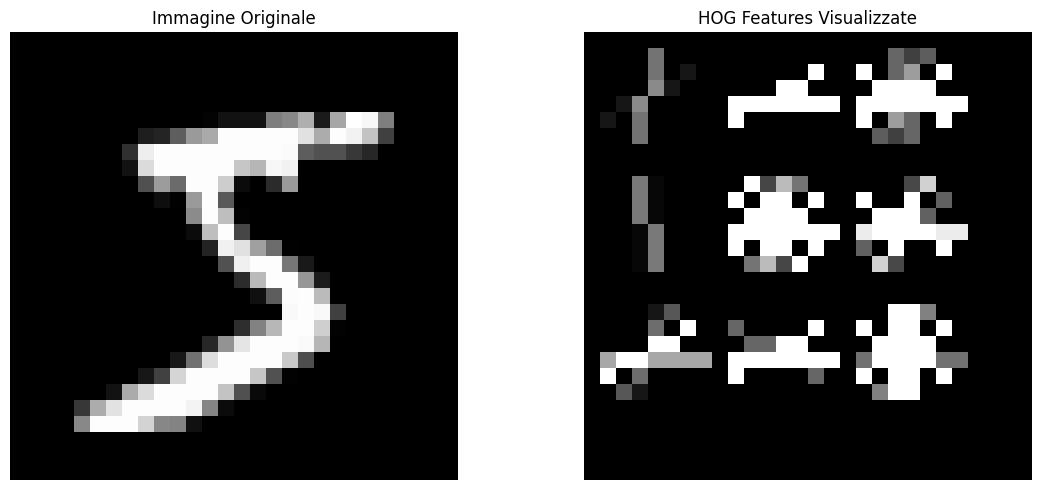

In [18]:
from skimage.feature import hog
from skimage import exposure

# Estrazione HOG features da un'immagine
sample_img = X_train[0]

# Calcola HOG
features, hog_image = hog(
    sample_img,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True
)

print(f"Dimensione feature vector HOG: {len(features)}")

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(sample_img, cmap='gray')
axes[0].set_title('Immagine Originale')
axes[0].axis('off')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
axes[1].imshow(hog_image_rescaled, cmap='gray')
axes[1].set_title('HOG Features Visualizzate')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 7.2 Estrazione Feature per tutto il Dataset

In [19]:
def extract_hog_features(images):
    """
    Estrae HOG features da un array di immagini.
    """
    features_list = []

    for img in images:
        features = hog(
            img,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=False
        )
        features_list.append(features)

    return np.array(features_list)


# Estrazione per un subset (per velocità)
print("Estrazione HOG features...")
n_samples = 10000

X_train_hog = extract_hog_features(X_train[:n_samples])
X_test_hog = extract_hog_features(X_test[:2000])
y_train_subset = y_train[:n_samples]
y_test_subset = y_test[:2000]

print(f"Shape HOG features training: {X_train_hog.shape}")
print(f"Shape HOG features test: {X_test_hog.shape}")
print("Estrazione completata")

Estrazione HOG features...
Shape HOG features training: (10000, 144)
Shape HOG features test: (2000, 144)
Estrazione completata


### 7.3 Classificazione con SVM

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Training SVM
print("Training SVM...")
svm_classifier = SVC(kernel='rbf', C=10, gamma='scale')
svm_classifier.fit(X_train_hog, y_train_subset)
print("Training completato")

# Predizioni
y_pred_svm = svm_classifier.predict(X_test_hog)

# Valutazione
accuracy_svm = accuracy_score(y_test_subset, y_pred_svm)
print(f"\nAccuracy SVM con HOG: {accuracy_svm:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_subset, y_pred_svm))

Training SVM...
Training completato

Accuracy SVM con HOG: 0.9455

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       175
           1       0.97      0.99      0.98       234
           2       0.93      0.98      0.96       219
           3       0.95      0.93      0.94       207
           4       0.94      0.94      0.94       217
           5       0.96      0.93      0.94       179
           6       0.93      0.95      0.94       178
           7       0.94      0.93      0.93       205
           8       0.91      0.91      0.91       192
           9       0.95      0.91      0.93       194

    accuracy                           0.95      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



### 7.4 Confronto: Approccio Classico vs Deep Learning

In [21]:
# Confronto equo: valutazione entrambi sullo stesso test set (2000 campioni)
# L'SVM e' stato valutato su X_test[:2000], quindi valutiamo anche la NN sullo stesso subset
X_test_subset_tensor = torch.FloatTensor(X_test_norm[:2000]).to(device)
y_test_subset_tensor = torch.LongTensor(y_test[:2000]).to(device)

model.eval()
with torch.no_grad():
    outputs = model(X_test_subset_tensor)
    _, predicted = torch.max(outputs, 1)
    nn_accuracy_subset = (predicted == y_test_subset_tensor).sum().item() / len(y_test_subset_tensor)

# Confronto performance
confronto = pd.DataFrame({
    'Approccio': ['HOG + SVM (Classico)', 'Neural Network (Deep Learning)'],
    'Accuracy': [accuracy_svm, nn_accuracy_subset],
    'Feature Engineering': ['Manuale (HOG)', 'Automatico (appreso)'],
    'Parametri': ['~100K (SVM)', '~109K (NN)']
})

print("Confronto Approcci (su 2000 campioni di test):")
print(confronto.to_string(index=False))

# Visualizzazione
plt.figure(figsize=(10, 6))
plt.barh(confronto['Approccio'], confronto['Accuracy'], color=['coral', 'steelblue'])
plt.xlabel('Accuracy')
plt.title('Confronto: Computer Vision Classica vs Deep Learning')
plt.xlim([0.85, 1.0])
for i, v in enumerate(confronto['Accuracy']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center')
plt.gca().invert_yaxis()
plt.show()

**Osservazioni:**

1. **Performance**: Le reti neurali tipicamente superano gli approcci classici su dataset complessi
2. **Feature Engineering**: DL elimina il bisogno di feature engineering manuale
3. **Dati**: DL richiede più dati, approcci classici possono funzionare con dataset piccoli
4. **Interpretabilità**: HOG + SVM è più interpretabile
5. **Computazione**: DL richiede più risorse (GPU)

---

## Esercizio 4

In [22]:
# ============================================================================
# ESERCIZIO 4: Architetture Neurali Avanzate per Image Classification
# ============================================================================
# Task: Confrontare diverse architetture neurali su task di classificazione multi-classe
# Dataset: Fashion MNIST completo (70000 immagini, 10 classi)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from sklearn.metrics import classification_report, confusion_matrix

# Caricamento dataset
np.random.seed(999)
torch.manual_seed(999)
fmnist_train_ex4 = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
fmnist_test_ex4 = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True)

X_fmnist = fmnist_train_ex4.data.numpy().reshape(-1, 784) / 255.0
y_fmnist = fmnist_train_ex4.targets.numpy()
X_test_fmnist = fmnist_test_ex4.data.numpy().reshape(-1, 784) / 255.0
y_test_fmnist = fmnist_test_ex4.targets.numpy()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Dataset Fashion MNIST Completo")
print(f"Train: {X_fmnist.shape}, Test: {X_test_fmnist.shape}")
print(f"Classi: {len(class_names)}")

# Helper function for training with early stopping and LR reduction
def train_fmnist_model(model, X_train_np, y_train_np, epochs=25, batch_size=256, val_split=0.15, patience_es=5, patience_lr=3, weight_decay=0.0):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=patience_lr, min_lr=1e-6)

    X_t = torch.FloatTensor(X_train_np).to(device)
    y_t = torch.LongTensor(y_train_np).to(device)

    n_val = int(len(X_t) * val_split)
    idx = torch.randperm(len(X_t))
    X_tr, y_tr = X_t[idx[n_val:]], y_t[idx[n_val:]]
    X_vl, y_vl = X_t[idx[:n_val]], y_t[idx[:n_val]]

    train_ds = TensorDataset(X_tr, y_tr)
    loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
    best_val_loss = float('inf')
    patience_counter = 0
    best_state = None

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for bx, by in loader:
            optimizer.zero_grad()
            out = model(bx)
            loss = criterion(out, by)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * bx.size(0)
            _, predicted = torch.max(out, 1)
            total += by.size(0)
            correct += (predicted == by).sum().item()

        train_loss = running_loss / total
        train_acc = correct / total

        model.eval()
        with torch.no_grad():
            val_out = model(X_vl)
            val_loss = criterion(val_out, y_vl).item()
            _, val_pred = torch.max(val_out, 1)
            val_acc = (val_pred == y_vl).sum().item() / len(y_vl)

        scheduler.step(val_loss)

        history['loss'].append(train_loss)
        history['accuracy'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_acc)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_state = {k: v.clone() for k, v in model.state_dict().items()}
        else:
            patience_counter += 1
            if patience_counter >= patience_es:
                model.load_state_dict(best_state)
                break

    return history

def evaluate_fmnist(model, X_np, y_np):
    model.eval()
    with torch.no_grad():
        X_t = torch.FloatTensor(X_np).to(device)
        y_t = torch.LongTensor(y_np).to(device)
        out = model(X_t)
        loss = nn.CrossEntropyLoss()(out, y_t).item()
        _, pred = torch.max(out, 1)
        acc = (pred == y_t).sum().item() / len(y_t)
    return loss, acc

# Step 1: Architettura Wide (pochi layer, molti neuroni)
model_wide = nn.Sequential(
    nn.Linear(784, 512), nn.ReLU(), nn.Dropout(0.3),
    nn.Linear(512, 256), nn.ReLU(), nn.Dropout(0.3),
    nn.Linear(256, 10)
).to(device)

print("Architettura WIDE:")
print(model_wide)
print(f'Parametri: {sum(p.numel() for p in model_wide.parameters()):,}')

# Step 2: Architettura Deep (molti layer, meno neuroni)
model_deep_ex4 = nn.Sequential(
    nn.Linear(784, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.2),
    nn.Linear(128, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.2),
    nn.Linear(128, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.2),
    nn.Linear(128, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.2),
    nn.Linear(128, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.2),
    nn.Linear(128, 10)
).to(device)

print("\nArchitettura DEEP:")
print(model_deep_ex4)
print(f'Parametri: {sum(p.numel() for p in model_deep_ex4.parameters()):,}')

# Step 3: Architettura Pyramid (neuroni decrescenti)
model_pyramid = nn.Sequential(
    nn.Linear(784, 512), nn.ReLU(), nn.BatchNorm1d(512), nn.Dropout(0.25),
    nn.Linear(512, 256), nn.ReLU(), nn.BatchNorm1d(256), nn.Dropout(0.25),
    nn.Linear(256, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.25),
    nn.Linear(128, 64), nn.ReLU(), nn.BatchNorm1d(64), nn.Dropout(0.25),
    nn.Linear(64, 10)
).to(device)

print("\nArchitettura PYRAMID:")
print(model_pyramid)
print(f'Parametri: {sum(p.numel() for p in model_pyramid.parameters()):,}')

# Step 4: Architettura Residual-like (con skip connections)
class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(in_features, in_features),
            nn.ReLU(),
            nn.BatchNorm1d(in_features)
        )

    def forward(self, x):
        return x + self.block(x)

class ResidualModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            ResidualBlock(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

model_residual = ResidualModel().to(device)

print("\nArchitettura RESIDUAL-LIKE:")
print(model_residual)
print(f'Parametri: {sum(p.numel() for p in model_residual.parameters()):,}')

# Training tutti i modelli
models_dict_ex4 = {
    'Wide': model_wide,
    'Deep': model_deep_ex4,
    'Pyramid': model_pyramid,
    'Residual': model_residual
}

histories_ex4 = {}
results_ex4 = []

print("\n" + "="*70)
print("TRAINING ARCHITETTURE")
print("="*70)

for name, model_arch in models_dict_ex4.items():
    print(f'\nTraining {name}...')
    history = train_fmnist_model(model_arch, X_fmnist, y_fmnist, epochs=25)
    histories_ex4[name] = history

    test_loss, test_acc = evaluate_fmnist(model_arch, X_test_fmnist, y_test_fmnist)
    n_params = sum(p.numel() for p in model_arch.parameters())

    results_ex4.append({
        'architettura': name,
        'test_accuracy': test_acc,
        'test_loss': test_loss,
        'num_params': n_params,
        'epochs_trained': len(history['loss'])
    })

    print(f"{name}: Test Acc={test_acc:.4f}, Params={n_params:,}, Epochs={len(history['loss'])}")

results_df_ex4 = pd.DataFrame(results_ex4).sort_values('test_accuracy', ascending=False)

print("\n" + "="*70)
print("CONFRONTO ARCHITETTURE")
print("="*70)
print(results_df_ex4.to_string(index=False))

# Step 5: Analisi performance migliore architettura
best_arch_name = results_df_ex4.iloc[0]['architettura']
best_model_arch = models_dict_ex4[best_arch_name]

best_model_arch.eval()
with torch.no_grad():
    X_test_t = torch.FloatTensor(X_test_fmnist).to(device)
    y_pred_probs = torch.softmax(best_model_arch(X_test_t), dim=1).cpu().numpy()
y_pred_ex4 = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test_fmnist, y_pred_ex4)

plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title(f'Confusion Matrix - Architettura {best_arch_name}')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f'\nClassification Report - {best_arch_name}:')
print(classification_report(y_test_fmnist, y_pred_ex4, target_names=class_names))

# Visualizzazione learning curves per tutte le architetture
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (name, history) in enumerate(histories_ex4.items()):
    axes[idx].plot(history['accuracy'], label='Train', linewidth=2)
    axes[idx].plot(history['val_accuracy'], label='Validation', linewidth=2)
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Accuracy')
    axes[idx].set_title(f'{name} Architecture')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Confronto parametri vs performance
fig, ax = plt.subplots(figsize=(10, 6))
archs = results_df_ex4['architettura'].values
params = results_df_ex4['num_params'].values / 1000
test_accs = results_df_ex4['test_accuracy'].values

colors = ['red', 'blue', 'green', 'orange'][:len(archs)]
scatter = ax.scatter(params, test_accs, s=300, alpha=0.6, c=colors)

for i, txt in enumerate(archs):
    ax.annotate(txt, (params[i], test_accs[i]), fontsize=11, ha='center')

ax.set_xlabel('Numero Parametri (K)')
ax.set_ylabel('Test Accuracy')
ax.set_title('Trade-off: Complessita Architettura vs Performance')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Confronto finale
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(archs))
width = 0.35

ax.bar(x, test_accs, width, label='Test Accuracy', alpha=0.8, color=colors)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Architettura')
ax.set_title('Confronto Performance Architetture')
ax.set_xticks(x)
ax.set_xticklabels(archs)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nMigliore architettura: {best_arch_name}")
print(f"Test Accuracy: {results_df_ex4.iloc[0]['test_accuracy']:.4f}")
print(f"Parametri: {results_df_ex4.iloc[0]['num_params']:,}")

print("\nEsercizio 4 completato!")

## 8. Esercitazione: Sistema di Riconoscimento Completo

Implementa un sistema completo di riconoscimento cifre.

In [23]:
class SistemaRiconoscimentoCifre:
    """
    Sistema completo per riconoscimento cifre.
    Supporta sia approccio classico che deep learning.
    """

    def __init__(self, approccio='deep_learning'):
        """
        Args:
            approccio: 'classico' o 'deep_learning'
        """
        self.approccio = approccio
        self.model = None
        self.scaler = None
        self.is_trained = False
        self.device = device

    def preprocess_image(self, image):
        """
        Preprocessa un'immagine singola.

        Args:
            image: array numpy (28, 28)

        Returns:
            Immagine preprocessata
        """
        if self.approccio == 'classico':
            features = hog(
                image,
                orientations=9,
                pixels_per_cell=(8, 8),
                cells_per_block=(2, 2),
                visualize=False
            )
            return features
        else:
            img_normalized = image / 255.0
            return img_normalized.flatten()

    def build_model(self):
        """
        Costruisce il modello in base all'approccio.
        """
        if self.approccio == 'classico':
            self.model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)

        elif self.approccio == 'deep_learning':
            self.model = nn.Sequential(
                nn.Linear(784, 128),
                nn.ReLU(),
                nn.BatchNorm1d(128),
                nn.Dropout(0.3),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.BatchNorm1d(64),
                nn.Dropout(0.3),
                nn.Linear(64, 10)
            ).to(self.device)

    def train(self, X_train_imgs, y_train_labels, X_val=None, y_val=None, epochs=10):
        """
        Addestra il modello.
        """
        print(f'Preprocessing {len(X_train_imgs)} immagini per {self.approccio}...')
        X_train_processed = np.array([self.preprocess_image(img) for img in X_train_imgs])

        if self.model is None:
            self.build_model()

        print(f'Training {self.approccio}...')

        if self.approccio == 'classico':
            self.model.fit(X_train_processed, y_train_labels)
        else:
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(self.model.parameters(), lr=0.001)

            X_t = torch.FloatTensor(X_train_processed).to(self.device)
            y_t = torch.LongTensor(y_train_labels).to(self.device)

            n_val = int(len(X_t) * 0.2)
            idx = torch.randperm(len(X_t))
            X_tr, y_tr = X_t[idx[n_val:]], y_t[idx[n_val:]]
            X_val_split, y_val_split = X_t[idx[:n_val]], y_t[idx[:n_val]]

            train_ds = TensorDataset(X_tr, y_tr)
            loader = DataLoader(train_ds, batch_size=128, shuffle=True)

            # Early stopping
            patience = 3
            best_val_loss = float('inf')
            patience_counter = 0
            best_state = None

            for epoch in range(epochs):
                self.model.train()
                for bx, by in loader:
                    optimizer.zero_grad()
                    out = self.model(bx)
                    loss = criterion(out, by)
                    loss.backward()
                    optimizer.step()

                if epochs >= 5:
                    self.model.eval()
                    with torch.no_grad():
                        val_out = self.model(X_val_split)
                        val_loss = criterion(val_out, y_val_split).item()

                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        patience_counter = 0
                        best_state = {k: v.clone() for k, v in self.model.state_dict().items()}
                    else:
                        patience_counter += 1
                        if patience_counter >= patience:
                            self.model.load_state_dict(best_state)
                            break

        self.is_trained = True
        print('Training completato')

    def predict(self, images):
        """
        Predice le cifre per un batch di immagini.

        Args:
            images: array di immagini

        Returns:
            Array di predizioni
        """
        if not self.is_trained:
            raise ValueError("Il modello deve essere addestrato prima")

        X_processed = np.array([self.preprocess_image(img) for img in images])

        if self.approccio == 'classico':
            return self.model.predict(X_processed)
        else:
            self.model.eval()
            with torch.no_grad():
                X_t = torch.FloatTensor(X_processed).to(self.device)
                outputs = self.model(X_t)
                _, predictions = torch.max(outputs, 1)
            return predictions.cpu().numpy()

    def evaluate(self, X_test_imgs, y_test_labels):
        """
        Valuta il modello sul test set.

        Returns:
            Dizionario con metriche
        """
        y_pred = self.predict(X_test_imgs)

        accuracy = accuracy_score(y_test_labels, y_pred)
        cm = confusion_matrix(y_test_labels, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predetto')
        plt.ylabel('Reale')
        plt.title(f'Confusion Matrix - {self.approccio}')
        plt.show()

        return {
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': classification_report(y_test_labels, y_pred)
        }

    def visualizza_predizioni(self, images, n=10):
        """
        Visualizza predizioni su sample di immagini.
        """
        if not self.is_trained:
            raise ValueError("Il modello deve essere addestrato prima")

        indices = np.random.choice(len(images), min(n, len(images)), replace=False)
        sample_images = images[indices]

        predictions = self.predict(sample_images)

        n_cols = 5
        n_rows = (n + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3 * n_rows))
        if hasattr(axes, 'flatten'):
            axes = axes.flatten()
        else:
            axes = [axes]

        for i, (img, pred) in enumerate(zip(sample_images, predictions)):
            if i < len(axes):
                axes[i].imshow(img, cmap='gray')
                axes[i].set_title(f'Predizione: {pred}', fontsize=12, fontweight='bold')
                axes[i].axis('off')

        for i in range(len(sample_images), len(axes)):
            axes[i].axis('off')

        plt.suptitle(f'Predizioni - {self.approccio}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()


# Test del sistema
print("=" * 60)
print("TEST SISTEMA RICONOSCIMENTO CIFRE")
print("=" * 60)

print("\n" + "=" * 60)
print("Test Approccio Deep Learning:")
print("=" * 60)
sistema_dl = SistemaRiconoscimentoCifre(approccio='deep_learning')
sistema_dl.train(X_train[:10000], y_train[:10000], epochs=15)
metriche_dl = sistema_dl.evaluate(X_test[:1000], y_test[:1000])
print(f"\nAccuracy: {metriche_dl['accuracy']:.4f}")

print("\n" + "=" * 60)
print("Test Approccio Classico:")
print("=" * 60)
sistema_classico = SistemaRiconoscimentoCifre(approccio='classico')
sistema_classico.train(X_train[:5000], y_train[:5000])
metriche_classico = sistema_classico.evaluate(X_test[:1000], y_test[:1000])
print(f"\nAccuracy: {metriche_classico['accuracy']:.4f}")

# Visualizzazione
print("\n" + "=" * 60)
print("Visualizzazione Predizioni")
print("=" * 60)
sistema_dl.visualizza_predizioni(X_test, n=10)

---

## Conclusioni

In questo notebook abbiamo esplorato:

- **Fondamenti Deep Learning**: definizione, evoluzione storica
- **Reti Neurali Artificiali**: neuroni, layer, forward/backpropagation
- **TensorFlow e Keras**: implementazione pratica di reti neurali
- **Training**: compilazione, fit, valutazione
- **Tecniche anti-overfitting**: Dropout, L2 Regularization, Early Stopping, Data Augmentation, Batch Normalization
- **Computer Vision**: rappresentazione immagini, task principali
- **Approccio classico**: HOG + SVM
- **Confronto**: CV classica vs Deep Learning

### Prossimi passi

Nel prossimo notebook approfondiremo:
- **Convolutional Neural Networks (CNN)**: architetture specifiche per immagini
- **Transfer Learning**: uso di modelli pre-trained
- **Fine-tuning**: adattamento di foundation models
- **Progetti avanzati di Computer Vision**

### Concetti chiave da ricordare

1. **Deep Learning = Feature Learning**: il modello impara le feature automaticamente
2. **Overfitting è il nemico principale**: usa sempre tecniche di regolarizzazione
3. **Normalizzazione è essenziale**: scala sempre i dati
4. **Validation set è obbligatorio**: per monitorare overfitting
5. **L'approccio classico ha ancora valore**: su dataset piccoli o quando serve interpretabilità

### Risorse per approfondire

- [Deep Learning Specialization - Andrew Ng](https://www.coursera.org/specializations/deep-learning)
- [TensorFlow Documentation](https://www.tensorflow.org/)
- [Keras Documentation](https://keras.io/)
- [Deep Learning Book - Goodfellow et al.](https://www.deeplearningbook.org/)
- [CS231n: Computer Vision - Stanford](http://cs231n.stanford.edu/)